# Mixture Model

We continue with the same example of ball and the urn.
So there are some urns and each urn has a distribution of colourful balls. Each time the user selects a urn and checks the color in it. 
In hierarchical modelling we knew from which urn the ball was taken and the only task was to learn the distribution of the color in each urn.

Suppose we dont know from which urn the ball was taken. We only know the color of the balls.
In such scenario we all need to determine how many urns were present and then the distribution in each urn.

Mixture models can be used in such scenarios. Here we will model this using mixture model and categorical distribution


# Constants

In [1]:
# Som constants
N = 1000 # number of trials
n_colors = 5 # Dimension of data
n_clusters = 10 # the number of clusters 
n_bags = 3

# Data Generation

In [2]:
from bayespy.utils import random
from bayespy import nodes
import numpy as np

p = nodes.Dirichlet(np.ones(n_colors),
                   plates=(n_bags,)).random()
z = random.categorical([1/n_bags, 1/n_bags, 1/n_bags], size=N)
x = random.categorical(p[z])
x = x.reshape(N,1)

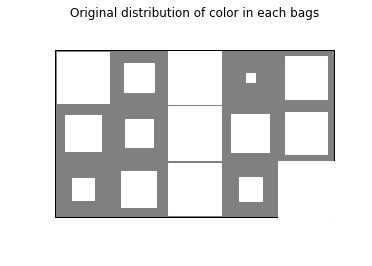

In [3]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(p)
bpplt.pyplot.title("Original distribution of color in each bags")


# Model

$\beta = <1 1 1 1 1 1 1 1 1 1> $ 

$ R \mid \beta \sim Dirichlet $ 

$ Z \mid R  \sim Categorical $ 


$ \gamma = <1 1 1 1 1> $ 

$ P \mid \gamma \sim Dirichlet $ 

$ X \mid P,Z \sim Mixture $


![Mixture Model](images/mixturemodel.png)


In [30]:
from bayespy import nodes

beta = n_clusters*[1e-5]
R = nodes.Dirichlet(beta,
                   name='R')
Z = nodes.Categorical(R,
                     plates=(N,1))

In [31]:
gamma = n_colors * [1e-5]
P = nodes.Dirichlet(gamma,
              plates=(n_clusters,))
P.plates

(10,)

In [32]:
from bayespy.nodes import Mixture, Bernoulli, Categorical
X = Mixture(Z, Categorical, P)

X.plates

(1000, 1)

In [33]:
from bayespy.inference import VB
Q = VB(Z, R, X, P)

In [34]:
P.initialize_from_random()

/home/deebuls/anaconda3/lib/python3.5/site-packages/bayespy/utils/random.py:330: RuntimeWarning: invalid value encountered in true_divide
  p /= np.sum(p, axis=-1, keepdims=True)
/home/deebuls/anaconda3/lib/python3.5/site-packages/bayespy/inference/vmp/nodes/dirichlet.py:81: RuntimeWarning: invalid value encountered in less
  if np.any(p < 0) or np.any(p > 1):
/home/deebuls/anaconda3/lib/python3.5/site-packages/bayespy/inference/vmp/nodes/dirichlet.py:81: RuntimeWarning: invalid value encountered in greater
  if np.any(p < 0) or np.any(p > 1):


ValueError: Probabilities must sum to one

In [35]:
X.observe(x)

In [20]:
Q.update(repeat=1000)

Iteration 1: loglike=-2.170129e+03 (0.000 seconds)
Iteration 2: loglike=-2.170129e+03 (0.000 seconds)
Converged at iteration 2.


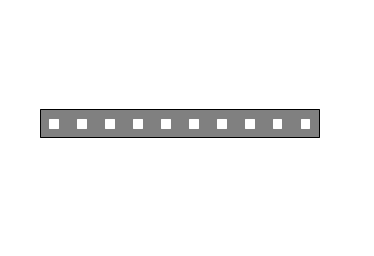

In [21]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(R)


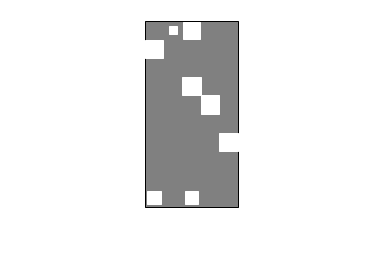

In [102]:
bpplt.hinton(P)
